# Inequality of underrepresented groups in PyData leadership

### Or what's up at the top of the PyData ecosystem?

So, I am the host of [Open Source Directions](https://www.quansight.com/open-source-directions), the webinar series (and, *yes*, soon podcast) about the roadmaps of projects in the PyData / Scientific Python space. I would like for the series to be a welcoming venue for the less-often-heard voices of the PyData community. Unfortunately, by focusing on projects and their lead/core developers, I (and other project leads) believe that we are reinforcing existing biases and overrepresentation.

Yes, there are steps we can take to address the diversity issues on Open Source Directions. We have adjusted our processes and procedures, with more significant changes to come in the future. I personally welcome any and all feedback in this regard. Feel free to reach out to me publicly or privately with your ideas and concerns.

But this post is not about that. This post is to show that we in the NumFOCUS and PyData community have vast inequalities in representation in the leadership of our projects.


## How should equality be measured?

One of my big pet peeves is that people usually discuss diversity & equality as a ratio between men/women. This is a terrible way to talk about this problem for a couple reasons:

1. There are many other axes of inequality, including economic class, social class, racial, ethnic, religious,
   educational, sexuality, and more!
2. Ratios only work for binary systems, and gender is not binary.
3. Equality & inequality should be bounded from $[0, 1]$, i.e. they should be fractional measures of how   
   equal a system is. A ratio of men/women is instead bounded from $[0, \infty]$, where both $0$ and $\infty$ 
   are perfectly unequal, and $1$ represents perfect equality.

I understand why people use men/women ratios. 

* They are deceptively easy to understand. 
* They probably track with other systemic inequalities. 
* In terms of population differences, it is (again deceptively) close to parity, with only [0.3-0.5% of the U.S. population identifying as transgender](https://www.nytimes.com/2015/06/09/upshot/the-search-for-the-best-estimate-of-the-transgender-population.html).
* It is universal in the sense that, while economic and racial differences changes from country to country, gender identity is often viewed as having the same ratio everywhere (it doesn't).
* It is very difficult to obtain reasonable data on inequality along avenues other than gender. This makes gender the easiest metric to actually analyze.

The above points do not make such ratios any less wrong.

In my [PyData Carolinas Keynote](https://youtu.be/fFKztg_ZRB4) ([slides](https://docs.google.com/presentation/d/148_jbdBCC4WjGmhY8s1wo8G3Yn2dZ1bc-PDBeg_Kp-w/edit?usp=sharing)) from a few years ago, I presented (what I feel is) a much better, information-theoretic, entropy-based model of equality & inequality. For a 3-gendered partitioning scheme (female, male, nonbinary), the Generalized Entropy Inequality measure (GEI, $G$) reduces to, 

$G = \ln(3) - H$

Where $H$ is our friend the Shannon entropy, or

$H = -\sum_{i=1}^S p_i \ln p_i$

$G$ has much better mathematical properties than a simple ratio. However, it is still not normalized onto the range of $[0, 1]$. To do this we need to subtract the minimal inequality (i.e. where the distribution matches the population at large, say $G(P)$) and divide by size of the domain.  Thus we have a normalized inequality measure $|G|$ that is:

$|G| = \frac{\ln(3)- H - G(P)}{\ln(3) - G(P)} = 1 - \frac{H}{\ln(3) - G(P)}$

## Methodology

In order to show quantitatively how unequal the leadership of PyData is, I have gone through the NumFOCUS fiscally sponsored projects and tried to determine gender of their leadership teams according to the following rules:

1. First, I looked at their websites.  If they listed as steering committee (as with Jupyter) or a core team (as with conda-forge), I would use this as the representative body.
2. If no leadership team was clearly posted, I would go to the repository and look at their top contributors. Yes, this subjects the project to the "tyranny of code contribution." I defined top contributors as those with more than 150 commits.
3. I tried to be as inclusive as possible, including all past members and subcommittee members (such as in pandas).

If you find problems with my counting, please put a PR into this repository that updates the `data.json` file!  I welcome all fixes.

I am picking on NumFOCUS here because doing so easily, discretely, and representatively limits the number of projects we have to analyze. Also, by virtue of being a NumFOCUS project, we can say that these projects are "important." Furthermore, I know that NumFOCUS can see this analysis in the spirit of working toward to more inclusive tomorrow that it is given. 

## Results 

In [3]:
%matplotlib inline
import json

import numpy as np
import matplotlib.pyplot as plt

In [26]:
def G(female=0.0, male=0.0, nonbinary=0.0):
    total = female + male + nonbinary
    p_i = np.array([female, male, nonbinary]) / total
    H_i = p_i * np.log(p_i)
    H_i[p_i == 0.0] = 0.0
    H = - H_i.sum()
    return np.log(3) - H


def norm_G(female=0.0, male=0.0, nonbinary=0.0, G_P=0.0):
    total = female + male + nonbinary
    p_i = np.array([female, male, nonbinary]) / total
    H_i = p_i * np.log(p_i)
    H_i[p_i == 0.0] = 0.0
    H = - H_i.sum()
    return 1.0  - H/(np.log(3) - G_P)
    

USA_population = G(female=49.75, male=49.75, nonbinary=0.5)
with open('data.json') as f:
    data = json.load(f)
project_inequalities = {}
for project, kwargs in data.items():
    project_inequalities[project] = norm_G(G_P=USA_population, **kwargs)

/home/scopatz/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/scopatz/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


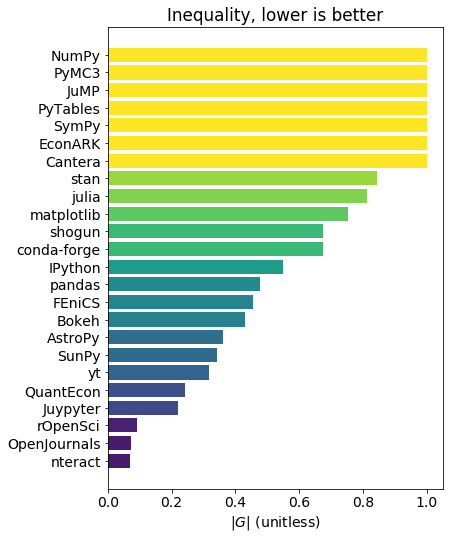

In [46]:
proj_ins = sorted(project_inequalities.items(), key=lambda x: -x[1])
cm = plt.get_cmap('viridis')

projects = [x[0] for x in proj_ins]
y_pos = np.arange(len(projects))
norm_Gs = [x[1] for x in proj_ins]
colors = list(map(cm, norm_Gs))

plt.rcParams['font.size'] = 14.0
fig, ax = plt.subplots()
fig.set_figheight(8.5)
ax.barh(y_pos, norm_Gs, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(projects)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('$|G|$ (unitless)')
t = ax.set_title('Inequality, lower is better')

Note that while some projects are more equal than others, no project has zero inequality. Also, just to be perfectly clear, all projects skew toward overrepresenting men. Furthermore, six projects have only men in leadership roles.

It is important to note again at this point that gender is only one axis of diversity, albeit an important axis. Still, keep in mind that projects which completely lack gender diversity may be representative along different equality measures (such as racial or ethnic). 

## Some Further Thoughts

### Active vs. Passive Diversity Problems

In discussing these issues with [Chris "CJ" Wright](https://billingegroup.github.io/people/cwright.html), the president of Columbia University's [qSTEM](https://www.facebook.com/QSTEMColumbia/) group (their LGBTQ+ STEM organization), and a close friend, there is a difference between *active* and *passive* diversity issues, where these terms are defined as:

* **Active:** There is a toxic member of a community - or a toxic culture as a whole - which prevents an
  equitable system of representation from evolving or destroys existing equitable systems.
* **Passive:** There are significant biases, in which the agents in the system will be unable to make major 
  strides toward equality by simply continuing the existing day-to-day activities.
  
I believe (anecdotally) that PyData has passive diversity issues with respect to project leadership. Over the years, we have made a ton of progress towards equality (thanks to Gina Helfrich and other members of [DISC](https://numfocus.org/programs/diversity-inclusion) and many, many others) on issues such as conference attendees, conference speakers, keynotes, board members, etc. However, this has not translated down to project leadership.

### Nonbinary vs Having More Specific Categories

Here, I lumped all non-male & non-female people into a single "nonbinary" category. However, other organizations provide more categories. For instance, the University of California provides [six categories for gender identification on their applications](https://jonathanturley.org/2015/07/29/university-of-california-gives-students-six-gender-identity-categories/). However, accurately knowing the percentage of the U.S. population that falls into each of these categories is effectively statistically impossible. My domestic partner (who is a Public Health professor) tells me that in most cases they have trouble tracking such data as it relates to population-level health issues.  

For the analysis here, adding more categories with zero-values would simply make the projects look even more unequal. (The $\ln(3)$ would become $\ln(6)$.) There is no reason to do this as the point of under-representation in leadership can be made well enough with only 3 categories.

### Quotas & Role of Media

In terms of Open Source Directions and other podcasts and webinars, the idea of having "diversity quotas" occasionally comes up.  These arise in the form of rules such as,

> Don't have an over-represented guest or project on the show unless they can also bring an underrepresented voice too.

These sorts of edicts rub me (and other prominent members of our community) the wrong way. The main, personal argument against having quotas is that we are a technical community, and folks want to judge and to be judged on their technical merits. Yes, there can be oppression in meritocracy as in other systems of government, but people don't want to be invited to the party just because they are the token $X$, $Y$, or $Z$. Guests should have a genuine knowledge and interest in the discussion topic at hand, and should be valued for that knowledge. You know, people should be valued as individuals and not because they make a project's inequality score go down.

Additionally, as a tech media outlet, there is the question of bias in our reporting on Open Source Directions. If the underlying system we are reporting on is not equal (it isn't), and we distort that perception are we being fair? Are we perpetuating an unequal system by reporting on the system as it is? I don't have good answers to these questions. I will say that [NPR had a 3rd party study performed](https://www.wnyc.org/story/235598-conclusions-nprs-liberal-bias/) a few years back on their alleged liberal bias. Interestingly (and spoiler alert), the conclusion was that listeners would perceive a slight bias in NPR based on their own point of view. I interpret this result as saying that NPR is so middle-of-the-road that you can be disappointed in them whenever they non-negatively report on an issue from a perspective you don't agree with.

I believe that ultimately the correct path is to have greater representation of currently underrepresented groups in the projects themselves. However, on Open Source Directions, I do not feel that forcing quotas is a productive path forward. Instead, we are encouraging projects to bring on guests from their development communities that are underrepresented. We are also going to be asking projects (as appropriate) what they are doing with respect to diversity in their development community. This is in an effort to bring greater awareness about these diversity issues.

### Things Can Change!

While it is easy to feel hopeless about these diversity issues, I am heartened by tweets such as the following by Peter Wang (co-founder of Anaconda, Inc.):

<blockquote class="twitter-tweet" data-partner="tweetdeck"><p lang="en" dir="ltr">We are looking to hire some OSS devs <a href="https://twitter.com/anacondainc?ref_src=twsrc%5Etfw">@anacondainc</a> for Numba, Dask, Pandas, Arrow dev. If there are underrepresented candidates for these roles that we should talk to, please let me know!</p>&mdash; Peter Wang (@pwang) <a href="https://twitter.com/pwang/status/1062176775059525637?ref_src=twsrc%5Etfw">November 13, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Again anecdotally, I believe that there is the will to address the disparities out there in the PyData ecosystem. We just need to channel it in a productive and inclusive direction. 